# Movies Dataset

Dataset source: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney  
Note: a copy of this dataset is already included in `input_data/movies.csv`

### Sam Berkson PA3

### Data Loading and Prep
Similar to our previous 2 EDA's, not a ton to do here.  We load in our data, and clean out null values, as well as rows with missing values.  Since our dataset is so large, i'm comfortable chopping rows off without worrying about significant changes to the compositin of our dataset.

In [135]:
import matplotlib.pyplot as plt
from mypytable import MyPyTable
import plot_utils
import utils
import importlib
# reload utils files
importlib.reload(plot_utils)
importlib.reload(utils)

table = MyPyTable()
table.load_from_file('input_data/movies.csv')

drop_row_indexes = []

# Cleaning up null values
for row in table.data:
    for val in row:
        if val == "N/A":
            drop_row_indexes.append(row[0])
        elif val == "NA":
            drop_row_indexes.append(row[0])
        elif val == "na":
            drop_row_indexes.append(row[0])
        elif val == "n/a":
            drop_row_indexes.append(row[0])
        else:
            continue

table.drop_rows(drop_row_indexes)

### Q1)
How many movies does each streaming service (Netflix, Hulu, Prime, Disney+) host? Who hosts the most movies?


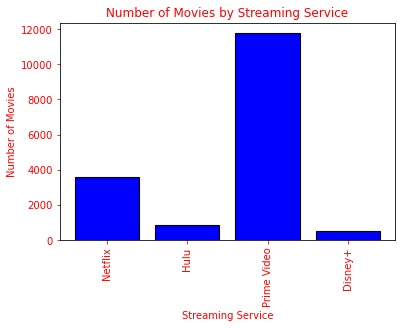

The service with the most movies is: Prime Video
Hulu has 878 movies
Netflix has 3560 movies
Prime Video has 11774 movies
Disney+ has 532 movies


In [136]:
def biggest_streaming_service(table, header):
    # Finds sum of streaming services 
    netflix_sum = 0
    hulu_sum = 0
    amazon_prime_sum = 0 
    disney_sum = 0

    for row in table:
        netflix_sum += int(row[header.index("Netflix")])
        hulu_sum += int(row[header.index("Hulu")])
        amazon_prime_sum += int(row[header.index("Prime Video")])
        disney_sum += int(row[header.index("Disney+")])

    # Determines and returns which streaming service has the most shows
    max_sum = max(netflix_sum, hulu_sum, amazon_prime_sum, disney_sum)

    if max_sum == netflix_sum:
        return "Netflix"
    elif max_sum == hulu_sum:
        return "Hulu"
    elif max_sum == amazon_prime_sum:
        return "Prime Video"
    else:
        return "Disney+"

netflix = table.get_column('Netflix')
hulu = table.get_column('Hulu')
prime = table.get_column('Prime Video')
disney = table.get_column('Disney+')

netflix_count = 0
hulu_count = 0
prime_count = 0
disney_count = 0

for row in table.data:
    if row[7] == 1:
        netflix_count += 1
    elif row[8] == 1:
        hulu_count += 1
    elif row[9] == 1:
        prime_count += 1
    elif row[10] == 1:
        disney_count += 1

plot_utils.bar_chart_helper(["Netflix", "Hulu", "Prime Video", "Disney+"], [netflix_count, hulu_count, prime_count, disney_count], "Number of Movies by Streaming Service", "Streaming Service", "Number of Movies")

print("The service with the most movies is: " + biggest_streaming_service(table.data, table.get_column_names()))
print("Hulu has " + str(hulu_count) + " movies")
print("Netflix has " + str(netflix_count) + " movies")
print("Prime Video has " + str(prime_count) + " movies")
print("Disney+ has " + str(disney_count) + " movies")

We can see that Prime Video by far has the highest number of movies with $11,774$ movies. Netflix is the next largest, with $3560$ movies.  Hulu and Disney+ have significantly less, coming in at $878$ and $532$, respectively.

### Q2)
Of the total occurrences of hosted movies (note a movie can be hosted on multiple services), what percent does each streaming service host?

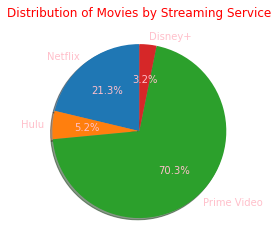

In [137]:


data = []
label = ["Netflix", "Hulu", "Prime Video", "Disney+"]

total_movies = hulu_count + netflix_count + prime_count + disney_count


percentage_netflix = netflix_count / total_movies
percentage_hulu = hulu_count / total_movies
percentage_prime = prime_count / total_movies
percentage_disney = disney_count / total_movies

# Load in percentages and graph on pie chart
data.append(percentage_netflix)
data.append(percentage_hulu)
data.append(percentage_prime)
data.append(percentage_disney)

plot_utils.pie_chart_helper(data, label, "Distribution of Movies by Streaming Service")

### Q3)
How does the distribution of IMDb ratings compare to the distribution of Rotten Tomatoes scores?

In [138]:
imdb_ratings = table.get_column('IMDb')
rotten_ratings = table.get_column('Rotten Tomatoes')

imdb = []
rotten = []

for row in table.data:
    imdb.append(str(row[5]))
    rotten.append(str(row[6]))

rotten_new = []
for val in rotten:
    if val != "":
        val = val[:-1]
        rotten_new.append(float(val))


imdb_new = []
for val in imdb:
    if val != "":
        imdb_new.append(float(val))

rotten_avg = sum(rotten_new) / len(rotten_new)
imdb_avg = sum(imdb_new) / len(imdb_new)

print("Rotten Tomatoes Average Rating: ", rotten_avg)
print("IMDb Average Rating:", imdb_avg * 10)

Rotten Tomatoes Average Rating:  65.42846064366033
IMDb Average Rating: 59.027514994125944


Apparently people on Rotten Tomatoes are much happier than IMDb!  IMDb has a average rating of $59$%, while Rotten Tomatoes boats an average rating of $65.43$%.

### Q4)
Are IMDb ratings and Rotten Tomatoes scores in agreement? Meaning if one rates a movie low (or high), is it likely the other one did as well? What is the strength of this relationship?

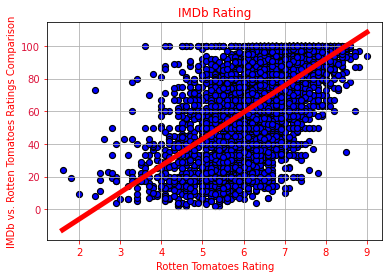

In [139]:
imdb = []
rotten_stage = []
rotten = []

for row in table.data:
    if (row[5] != "" and row[6] != ""):
        imdb.append(float(row[5]))
        rotten_stage.append(str(row[6]))

for val in rotten_stage:
    val = val[:-1]
    rotten.append(float(val))

plot_utils.scatter_plot_helper(imdb, rotten, "IMDb Rating", "Rotten Tomatoes Rating", "IMDb vs. Rotten Tomatoes Ratings Comparison")

The scores match pretty well, as evidenced by similar average ratings over the entire platform, as well as the positive correlation coefficent as evidenced by the scatter plot above. This is a strong relationship!

### Step 2


In [140]:
genre_list = []
genre_raw = table.get_column('Genres')

for row in genre_raw:
    if (row != "" and row not in genre_list):
        genre = row.split(',')
        genre_list.append(genre[0])

genres = []
for val in genre_list:
    if val not in genres:
        genres.append(val)

print(genres)




['Action', 'Adventure', 'Western', 'Animation', 'Biography', 'Drama', 'Crime', 'Comedy', 'Documentary', 'Family', 'Horror', 'Thriller', 'Mystery', 'Fantasy', 'Romance', 'Short', 'Sci-Fi', 'Talk-Show', 'Sport', 'Reality-TV', 'Musical', 'Music', 'War', 'News', 'History', 'Game-Show', 'Film-Noir']
